# protospacer flanking sequences data exploration

In [221]:
# 05/07
# Made by L-F-S
# At the University Of Trento, Italy

import os

import sys
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
# for clustal alignments
#from Bio import AlignIO
#from Bio.Align.Applications import ClustalwCommandline
#from Bio.Align import AlignInfo
# to make logos
import logomaker as lm

feature="Cas9" #WARNING!!! CHANGE THIS!!
datadir="/shares/CIBIO-Storage/CM/news/users/lorenzo.signorini/8pamsearch/out/"
seqid ="LEAPHKCP_01380"   # MANUAL INPUT
outdir=datadir+seqid+"/"


### Load file

In [222]:
PAM_dataset_name="dataset_flanking_sequences_of_putative_protospacers"
PAMdata=pd.read_csv(outdir+PAM_dataset_name, header=None)
PAMdata.head()

,0,1,2,3,4,5
0,NODE_13812_length_1615_cov_2.47436,TCGCCGTAGGTGAGCGTCGCGGTGTAGACGCCGGCCTTGAAGAGCG...,TTCTCCCATACGCTGTTCACCTCGGGGTCGTCCGAGTGGATCATGA...,AsnicarF_2017__MV_FEM2_t1Q14.contigs_filtered....,0,GGCGGCGTTGAACGCGTCGGCG
1,NODE_7863_length_2501_cov_2.04702,CGATCGTGCGCATGACCGTCGTGCCGATGGCCACGACCTTGTGGCC...,GCTTCGTCGGTGACGAAGAACTGCTCGGAATCCATCTTGTGCTTCG...,AsnicarF_2017__MV_FEM2_t1Q14.contigs_filtered....,0,GTTTTGGCGGCGTTGACCGCCTCGGCG
2,NODE_12953_length_1615_cov_4.0000_ID_98801,TCGCCGTAGGTGAGCGTCGCGGTGTAGACGCCGGCCTTGAAGAGCG...,TTCTCCCATACGCTGTTCACCTCGGGGTCGTCCGAGTGGATCATGA...,AsnicarF_2017__MV_FEM2_t1Q14_megahit.contigs_f...,0,GGCGGCGTTGAACGCGTCGGCG
3,NODE_4817_length_2876_cov_3.73591,TCGCCGTAGGTGAGCGTCGCGGTGTAGACGCCGGCCTTGAAGAGCG...,TTCTCCCATACGCTGTTCACCTCGGGGTCGTCCGAGTGGATCGTGA...,AsnicarF_2017__MV_FEM5_t2Q14.contigs_filtered....,0,GGCGGCGTTGAACGCGTCGGCG
4,NODE_744_length_14946_cov_6.0000_ID_22014,TCGCCGTAGGTGAGCGTCGCGGTGTAGACGCCGGCCTTGAAGAGCG...,TTCTCCCATACGCTGTTCACCTCGGGGTCGTCCGAGTGGATCGTGA...,AsnicarF_2017__MV_FEM5_t2Q14_megahit.contigs_f...,0,GGCGGCGTTGAACGCGTCGGCG


col0: contig, col1: upstream flanking sequence, col1: downtream flanking sequence, col3: samplename col4: bin (0 if unbinned)  col5: protospacer

In [224]:
PAMdata.shape

(2308, 6)

## Check length of flanking regions

### Upstream

In [225]:
PAMdata[1].str.count("").value_counts() # is 51 instead of 50 because .str.count("") adds 1

51    2308
Name: 1, dtype: int64

In [226]:
print(PAMdata[1].shape,PAMdata[1].dropna().shape)

(2308,) (2308,)


### Downstream

In [227]:
#count how many downstream ar different from 51
PAMdata[2].str.count("").value_counts()

51    2308
Name: 2, dtype: int64

In [228]:
print(PAMdata[2].shape,PAMdata[2].dropna().shape)

(2308,) (2308,)


## Confirm absence of Nans

In [229]:
#only downstream NAs:
PAMdata[PAMdata[1].isnull()].shape

(0, 6)

In [230]:


PAMdata[PAMdata[2].isnull()].shape

(0, 6)

## chck if some sequences are shorter (with x)
### Total

In [231]:
x=0
for i,row in PAMdata.iterrows():
    if "X" in row[1] or "X" in row[2]:
        x+=1
print("Number of rows with at least a missing value", x)


Number of rows with at least a missing value 85


### Upstream


In [232]:
### upstream:
PAMdata[1].str.count("X").value_counts().sort_index()
# n' X   # n of sequences with that n of X

0     2272
2        2
6        1
7        1
8        3
11       1
12       3
13       1
17       2
18       1
21       1
31       2
32       1
33       1
34       1
35       1
36       1
38       2
39       2
40       1
41       1
45       1
48       6
Name: 1, dtype: int64

### Downstream

In [233]:
PAMdata[2].str.count("X").value_counts().sort_index()


0     2259
1        3
4        1
5        1
6        2
7        3
8        1
9        8
11       1
13       4
14       1
16       2
17       1
18       1
20       1
24       1
25       1
27       1
28       1
30       1
32       2
33       1
34       1
36       1
37       1
39       1
44       2
48       1
49       2
50       2
Name: 2, dtype: int64

In [204]:
PAMdata.shape

(57, 6)

# Sequence logos

In [234]:
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata[1])
counts_mat.to_csv(outdir+"upstream.pileup")
counts_mat.head()

,A,C,G,T,X
pos,,,,,
0,140.0,980.0,511.0,641.0,36.0
1,1039.0,811.0,205.0,217.0,36.0
2,816.0,579.0,582.0,297.0,34.0
3,783.0,860.0,169.0,462.0,34.0
4,462.0,789.0,140.0,883.0,34.0


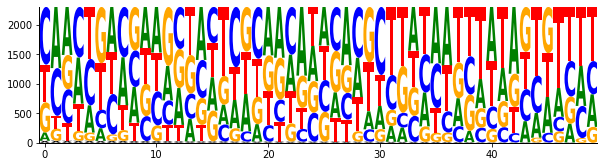

In [235]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"upstream.logo.pdf")

In [236]:
#downstream:
counts_mat = lm.alignment_to_matrix(PAMdata[2])
counts_mat.to_csv(outdir+"downstream.pileup")
counts_mat.head()

,A,C,G,T,X
pos,,,,,
0,628.0,428.0,369.0,881.0,2.0
1,611.0,212.0,91.0,1390.0,4.0
2,544.0,510.0,410.0,839.0,5.0
3,678.0,249.0,167.0,1209.0,5.0
4,781.0,439.0,278.0,805.0,5.0


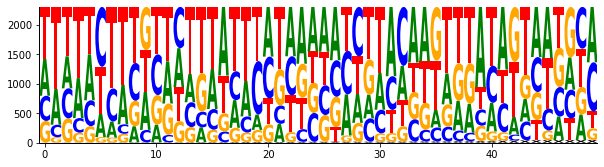

In [237]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"downstream.logo.pdf")

###  try filtering out binned ones..

In [238]:
PAMdata_unbinned=PAMdata[PAMdata[4]=="0"]
print(PAMdata_unbinned.shape)

(1919, 6)


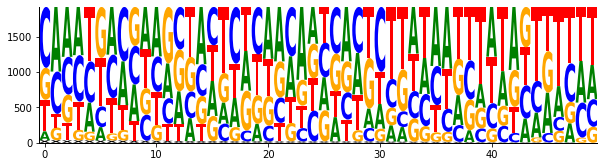

In [239]:
#redo the same stuff
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[1])
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"upstream.unbinned.logo.pdf")

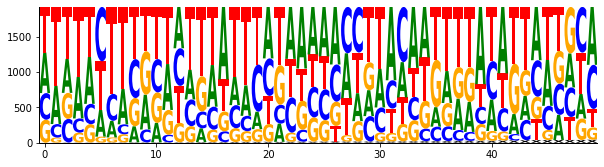

In [241]:
#downstream:
# 1: remove strings with different length:
downstream=PAMdata_unbinned[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"downstream.unbinned.logo.pdf")

# Extract most represented nucleotides

### upstream

In [242]:
# load file
counts_mat=pd.read_csv(outdir+"upstream.pileup", index_col=0)
# or use current data
upstream=""
for i, n in counts_mat.iterrows():
    upstream+=n.idxmax()
print("double checking correct length of 50:", len(upstream)==counts_mat.shape[0]==50)
print("Most represented upstream sequence:", upstream)


double checking correct length of 50: True
Most represented upstream sequence: CAACTGACGAAGCTACTCGCAACATACACGCTTATAATTTATAGTGTTTT


In [243]:
# with unbinned contigs only:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[1])
upstreamu=""
for i, n in counts_mat.iterrows():
    upstreamu+=n.idxmax()
print("double checking correct length of 50:", len(upstreamu)==counts_mat.shape[0]==50)
print("Most represented upstream sequence:", upstreamu)

print("Are they the same?", upstream==upstreamu)

double checking correct length of 50: True
Most represented upstream sequence: CAAATGACGAAGCTACTCTCAACAATCACTCTTATAATTTATAGTTTTTT
Are they the same? False


### Downstream

In [247]:
counts_mat=pd.read_csv(outdir+"downstream.pileup", index_col=0)
downstream=""
for i, n in counts_mat.iterrows():
    downstream+=n.idxmax()
print("double checking correct length of 50:", len(downstream)==counts_mat.shape[0]==50)
print("Most represented downstream sequence:", downstream)

double checking correct length of 50: True
Most represented downstream sequence: TTTTTCTTTGTTCTTTATTTATAAAAATCTTACAAGTTTATAGTAATGCA


In [248]:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[2])
downstreamu=""
for i, n in counts_mat.iterrows():
    downstreamu+=n.idxmax()
print("double checking correct length of 50:", len(downstreamu)==counts_mat.shape[0]==50)
print("Most represented down sequence:", downstreamu)

print("Are they the same?", downstream==downstreamu)

double checking correct length of 50: True
Most represented down sequence: TTTTTCTTTTTTATTTATTTATAAAAACCTTACAATTTTATATTATTGCA
Are they the same? False


## Check dataset repetition

In [249]:
PAMdata[3].str[0:8].value_counts()

ZeeviD_2    185
XieH_201    173
BritoIL_    153
NielsenH    130
Schirmer    126
LeChatel    126
BackhedF    106
LiJ_2014     98
FengQ_20     97
Karlsson     94
HMP_2012     89
ZellerG_     83
CM_madag     75
VatanenT     72
QinJ_201     68
IjazUZ_2     55
CosteaPI     52
Obregon-     40
Vogtmann     40
Chengpin     40
Bengtsso     35
CM_carit     31
KosticAD     31
YuJ_2015     30
QinN_201     29
LoombaR_     25
WenC_201     25
LouisS_2     18
Hannigan     18
Rampelli     16
CM_perii     16
HeQ_2017     16
LiuW_201     15
RaymondF     14
OhJ_2014     14
VincentC     10
LiJ_2017     10
GeversD_      9
SmitsSA_      8
ChngKR_2      7
AsnicarF      7
CM_cf__C      6
OlmMR_20      5
LomanNJ_      4
Lawrence      4
LiSS_201      3
Name: 3, dtype: int64

In [250]:
# extract most represented sequence without a given dataset
counts_mat = lm.alignment_to_matrix(PAMdata[~PAMdata[3].str.startswith("XieH")][2])
downstreamx=""
for i, n in counts_mat.iterrows():
    downstreamx+=n.idxmax()
print("double checking correct length of 50:", len(downstreamx)==counts_mat.shape[0]==50)
print("Most represented down sequence:", downstreamx)

print("Are they the same?", downstream==downstreamx)

double checking correct length of 50: True
Most represented down sequence: TTTTTCTTTTTTCTTTATTTATAAAAACCTTACAAGTTTATATTATTGCA
Are they the same? False


# Final extracted sequence: 50 upstream + protospacer + 50 downstream:

In [251]:
import numpy as np
print("protospacers", np.unique(PAMdata[5]))

protospacers ['AAACGGGCGCACGATGATGCGGTTGTG' 'AAACGGGCGCGCAGTATGATGCGGTTGTG'
 'AACATGGACGGTTACCTGTTGAAGCGTATC' 'AATCAAATCGTACTCACGAAAC'
 'AATCGCACCGCCTGCGGTCGCG' 'AATGGCGCTCGACTTTGTTTCGAAGTTTAG'
 'ACGACGGCGACGGTGCGGGCTTC' 'ACGCGCCCTTGGCATCGAT'
 'AGAACAAACATATTATCCACGCAAGAAAGGA' 'ATACGGTTCAAGTCATTGCCGCAA'
 'ATACGGTTGAAGTCATTGCCGCAAGTTCAG' 'ATGTTCATTTGTTTTACTCCTTTTC'
 'ATTAAGTGGGTTGATTATTACTGATATTTG' 'ATTTGTCATTTGTTTTACTCCTTTT'
 'ATTTTCATTGTTTTACTCCTTTTC' 'ATTTTCATTTATTTTACTCCTTTT'
 'ATTTTCATTTATTTTACTCCTTTTC' 'ATTTTCATTTGTTTAACTCCTTTT'
 'ATTTTCATTTGTTTAACTCCTTTTC' 'ATTTTCATTTGTTTCACTCCTTT'
 'ATTTTCATTTGTTTTACTCCTT' 'ATTTTCATTTGTTTTAGCTCCTTT'
 'ATTTTCATTTGTTTTCTCCTTTT' 'ATTTTCATTTGTTTTTCTCCTTT'
 'ATTTTCATTTTTTTACTCCTTTTC' 'ATTTTCATTTTTTTTACTCCTTTT'
 'CCCGCGACAATCGCACCGCCTGCGTTCGCG' 'CCTTGCCGTGCTTATAATCACAGATAGT'
 'CGAACGGCGACGTTGCGGGCTTC' 'CGACGCGCCCTTGGCATCGATTGAAAGACG'
 'CGACGCGCTCTTGGAATCGATTGAAAGACG' 'CGACGCGCTCTTGGCATCGATTGAAATACG'
 'CGACGCGCTCTTGGCATTGATTGAAAGACG' 'CGCAGTCCTGCGGTTGT

In [252]:
print("protospacer:", PAMdata.loc[0][5])

protospacer: GGCGGCGTTGAACGCGTCGGCG


In [253]:
print(upstream+PAMdata.loc[0][5]+downstream)

CAACTGACGAAGCTACTCGCAACATACACGCTTATAATTTATAGTGTTTTGGCGGCGTTGAACGCGTCGGCGTTTTTCTTTGTTCTTTATTTATAAAAATCTTACAAGTTTATAGTAATGCA
